In [20]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

<h1 style="text-align:center;"><b>Algoritmos de Búsqueda Clásicos y Cuántico</b></h1>

<h3 style="text-align:left;">Algoritmos de búsqueda clásicos</h3>


<label><b>Búsqueda Lineal o Secuencial</b></label>

In [6]:
def busqueda_lineal(lista, x):
i = 0		 

for z in lista:	
if z == x:	
return i 
i=i+1	

return -1

print(busqueda_lineal([5, 15, 25, 30, 88, 45, 50, 78, 67, 100, 150], 150))

10


<label><b>Búsqueda Binaria o dicotómica<b></label>

In [11]:
def busqueda_binaria(lis, val):  

    ini = 0
    fin = len(lis)-1
    index = -1

    while (ini <= fin) and (index == -1):	
        mit = (ini+fin)//2					
        
        if lis[mit] == val:
            index = mit
        else:
            if val < lis[mit]:
                fin = mit -1
            else:
                ini = mit +1
    
    return index

print(busqueda_binaria([5, 15, 25, 30, 45, 50, 67, 78, 88, 100,	150], 78))

7


<label><b>Búsqueda Exponencial o al galope</b></label>

In [ ]:
def busqueda_exponencial(lis, val):
    arr = []

    if lis[0] == val:
        return 0
    else:   
        index = 1

        while index < len(lis) and lis[index] <= val:
            index *= 2
            print(index)
    return busqueda_binaria(arr[:min(index, len(lis))], val)

print(busqueda_exponencial([1,2,3,4,5,6,7,8],3))

<label><b>Búsqueda de Interpolación</b></label>

In [18]:
def busqueda_interpolacion(lis, val):  
    x1 = 0
    x2 = (len(lis) - 1)
    
    while x1 <= x2 and val >= lis[x1] and val <= lis[x2]:
        index = x1 + int(((float(x2 - x1) / ( lis[x2] - lis[x1])) * ( val - lis[x1])))
        if lis[index] == val:
            return index
        if lis[index] < val:
            x1 = index + 1;
        else:
            x2 = index - 1;
            
    return -1

print(busqueda_interpolacion([1,2,3,4,5,6,7,8], 6))

5


<label><b>Búsqueda de Salto</b></label>

In [44]:
import math

def busqueda_salto(lis, val):  
    
    v1 = len(lis)
    salto = int(math.sqrt(v1))
    izq, der = 0, 0
    
    while izq < v1 and lis[izq] <= val:
        
        der = min(v1 - 1, izq + salto)
        
        if lis[izq] <= val and lis[der] >= val:
            break
        izq += salto;
    
    if izq >= v1 or lis[izq] > val:
        return -1
    
    der = min(v1 - 1, der)
    i = izq
    
    while i <= der and lis[i] <= val:
        if lis[i] == val:
            return i
        i += 1
    
    return -1

print(busqueda_salto([1,2,3,4,5,6,7,8,9], 5))

4


<label><b>Búsqueda Ternaria</b></label>

In [ ]:
def busqueda_ternaria(f, l, r, absolutePrecision):   
    
    while True:
        #l and r son los límites actuales; el máximo está entre ellos
        if abs(r - l) < absolutePrecision:
            return (l + r)/2

        m1 = l + (r - l)/3
        m2 = r - (r - l)/3

        if f(m1) < f(m2):
            l = m1
        else:
            r = m2
            
print(busqueda_ternaria([1,2,3,4,5,6,7,8,9], 1, 9, 3))

<label><b>Búsqueda por transformación de claves o Hash</b></label>

In [43]:
dic = {}
lish = [54, 26, 93, 17, 77, 31]
numele = 11

for c in range(0, numele):
    dic[c] = 'Null'

print(dic)

for i in lish:
    h = i % len(dic)
    dic[h] = i
    #print(i,'=',h)
print(dic)

print(dic[5])

{0: 'Null', 1: 'Null', 2: 'Null', 3: 'Null', 4: 'Null', 5: 'Null', 6: 'Null', 7: 'Null', 8: 'Null', 9: 'Null', 10: 'Null'}
{0: 77, 1: 'Null', 2: 'Null', 3: 'Null', 4: 26, 5: 93, 6: 17, 7: 'Null', 8: 'Null', 9: 31, 10: 54}
93


<label><b>Búsqueda en List</b></label>

In [27]:
lis1 = [1,2,3,4,5,6,7,8,9]

print(8 in lis1)
print(lis1.index(8))

True
7


<label><b>Búsqueda en Diccionarios</b></label>

In [29]:
d1 = {'a': 50, 'b': 60, 'c': 80}
d1['d'] = [90, 100]

print(d1['d'])

[90, 100]


<h2>Algoritmo de búsqueda cuántico</h2>

6 qubits, basis states [45, 40] marked, 4 rounds


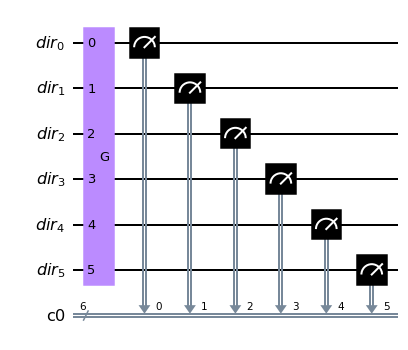

In [41]:
#Grover para multiple busquedas

from qiskit import *
from qiskit.quantum_info import Operator
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
import numpy as np

def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)
    # create the identity matrix on n qubits 32
    oracle_matrix = np.identity(2**n)
    # add the -1 phase to marked elements
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    
    gate = qc.to_gate()
    gate.name = "oracle"
    
    return gate

def diffuser(n):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')    
    # apply hadamard gates to all qubits
    qc.h(range(n))
    # call the phase oracle applied to the zero state
    qc.append(phase_oracle(n, [0]), range(n))
    
    # apply hadamard gates to all qubits
    qc.h(range(n))
    
    gate = qc.to_gate()
    gate.name = "difusor"
    
    return gate

def Grover(n, indices_of_marked_elements):
    
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n)    
    # Determine r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')
    
    # step 1: apply Hadamard gates on all qubits
    qc.h(range(n))
    
    # step 2: apply r rounds of the phase oracle and the diffuser
    for i in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        qc.append(diffuser(n), range(n))
        
    # step 3: measure all qubits
    #qc.measure(range(n), range(n))
    
    gate = qc.to_gate()
    gate.name = "G"
    
    return gate

########################################################
#Main
#########################################################
n = 6
marked =  [45,40]

addr = QuantumRegister(n,'dir')

c = ClassicalRegister(n)
qc = QuantumCircuit(addr,c)

qc.append(Grover(n,marked),addr[:])

qc.measure(range(n), range(n))

qc.draw()

{'101000': 518, '101101': 482}
2


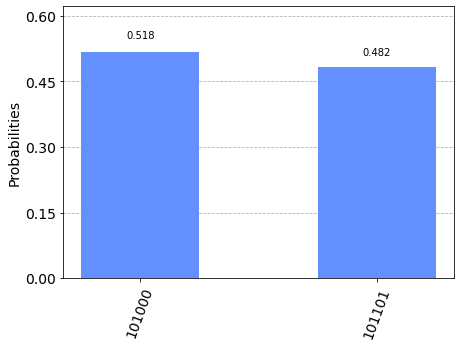

In [42]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=1000).result().get_counts(qc)
from qiskit.visualization import plot_histogram
print(counts)
print(len(counts))
plot_histogram(counts)